# **Basic Data Science Projects using Python, NumPy, Pandas, Matplotlib, Regular Expressions, and SQL**

<center>

*By: Prof. James Abello, Haoyang Zhang*

*Computer Science Department*

*Rutgers University*

*Nov. 21, 2024.*

</center>

## Topic 1: Game of Life (NumPy, matplotlib)

#### **Objective:** Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

#### **Estimated Completion Time: 6 hours**


This game is an example of a Cellular Automaton. Each cell corresponds to a point in 2D.

A good video reference is 
> Stephen Hawkings The Meaning of Life (John Conway's Game of Life segment) by 0524432
> 
> https://www.youtube.com/watch?v=CgOcEZinQ2I

Consider a grid of 2D cells each represented by a 2D unit square. Each cell has two states: dead (encoded as 0) or alive (encoded as 1). Each cell in the grid is updated in discrete time steps depending on the **state of its eight neighbors**. 

Initially, some cells are selected randomly to be alive and the rest are dead. The grid is updated in **each time step** according to the following **basic** rules:
- if a dead cell has 3 neighbors alive, then it the comes back to life
- if an alive cell has 2 or 3 neighbors alive, then the cell continues to be alive.
- if an alive cell has less than 2 or more than 3 neighbors alive, then the cell dies.

**The goal** of the game is to find patterns that evolve in interesting ways – something that people have now been doing for over 50 years.
> https://playgameoflife.com/

For example:
- gliders: 
    > https://playgameoflife.com/lexicon/glider
- spaceships:
    > https://playgameoflife.com/lexicon#iz5
- splitter
    > https://playgameoflife.com/lexicon/splitter
- Herschel receiver
    > https://playgameoflife.com/lexicon/herschel-receiver
- G4 receiver
    > https://playgameoflife.com/lexicon/G4_receiver

**What to submit:**
- Your code that simulates the game of life with the **basic rules**.
- A 30-second video of a pattern that was generated by your code and you find surprising or interesting.

An approach to be successful is to design on local patterns that could generate other patterns according to the specified rules. Another approach is to try to understand the effect of different rules.

### Tasks

#### Level 1 (fixed set of rules, 15 pts) 
From a randomly selected initial subset of life cells, and a fixed set of rules, find interesting patterns

```mermaid
graph TB
    Init["Generate an initial random subset of life cells (2D points)"]
    Draw_init["Display the 2D positions of the selected collection of cells (2D points)"]
    Update["For each cell evaluate the update rules specified above to obtain its new state"]
    Draw["Display the 2D positions of the current life cells (2D points)"]
    More{"Ask the user if he/she wants to update once more?"}

    START([Start])
    END([End])

    START --> Init
    Init --> Draw_init
    Draw_init --> Update
    Update --> Draw
    Draw --> More
    More -- Yes --> Update
    More -- No --> END  
```

##### Task 1.1
After playing the game at https://playgameoflife.com/
- Implement a Python function `init_life_state_1()` by using NumPy to generate an initial random subset of life cells (a subset of coordinates whose representing points are considered alive).
- Implement a Python function `draw_life_state_1()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in light gray.
    ```python
    def draw_cell_background(x, y):
        plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')
    ```


In [9]:
import sys
!(sys.executable} -m pip install ipython-sql

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def draw_cell_background(x, y):
        plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color='lightgray')


```python
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice([0, 1], size=(n, m), p=[1-p, p])

def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    plt.clf()
    
    n, m = life_state.shape

    for i in range(n):
        for j in range(m):
            draw_cell_background(j, n-i-1)  
            if life_state[i, j] == 1:
                plt.fill([j-0.5, j-0.5, j+0.5, j+0.5],
                         [n-i-1-0.5, n-i-1+0.5, n-i-1+0.5, n-i-1-0.5],
                         color='black')
    plt.xlim(-0.5, m-0.5)
    plt.ylim(-0.5, n-0.5)
    plt.axis('off')
    plt.show()

In [12]:
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return np.random.choice([0, 1], size=(n, m), p=[1-p, p])

def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
    OUT: None
    """
    plt.clf()
    
    n, m = life_state.shape

    for i in range(n):
        for j in range(m):
            draw_cell_background(j, n-i-1)  
            if life_state[i, j] == 1:
                plt.fill([j-0.5, j-0.5, j+0.5, j+0.5],
                         [n-i-1-0.5, n-i-1+0.5, n-i-1+0.5, n-i-1-0.5],
                         color='black')
    plt.xlim(-0.5, m-0.5)
    plt.ylim(-0.5, n-0.5)
    plt.axis('off')
    plt.show()

##### Task 1.2

Implement a Python function `update_life_state_1()` that takes a 2D NumPy array representing the current state of the grid and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

Note: Make sure that all the cells are updated simultaneously. That is, the new state of each cell should be computed based on the original state of all the cells.

```python
def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape

    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)

    for i in range(n):
        for j in range(m):
            neighbors = (
                life_state[max(0, i-1):min(n, i+2), max(0, j-1):min(m, j+2)].sum()
                - life_state[i, j]
            )
            if life_state[i, j] == 1:
                out_life_state[i, j] = 1 if neighbors in [2, 3] else 0
            else:
                out_life_state[i, j] = 1 if neighbors == 3 else 0

    return out_life_state
```

In [15]:
def update_life_state_1(life_state, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape

    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)

    for i in range(n):
        for j in range(m):
            neighbors = (
                life_state[max(0, i-1):min(n, i+2), max(0, j-1):min(m, j+2)].sum()
                - life_state[i, j]
            )
            if life_state[i, j] == 1:
                out_life_state[i, j] = 1 if neighbors in [2, 3] else 0
            else:
                out_life_state[i, j] = 1 if neighbors == 3 else 0

    return out_life_state

# Task 1.3

Use `draw_life_state_1()` to display the current state of the grid.

##### Task 1.4

Implement a Python function `play_game_of_life_1()` that uses the functions implemented above to play the game of life. The function should ask the user the desired number of iterations to update the grid and display the grid at each iteration. When reaching the desired number of iterations, the function should ask the user if he/she wants to update more times. If the user does not want to continue updating, the function should ask the user if he/she wants to save the initial collection of life cells and the final configuration (caveat: this may not be always feasible) as a csv file.

```python
def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    
    life_state = init_life_state_1(n, m, p)
    initial_state = life_state.copy()
    
    draw_life_state_1(life_state)
    
    while True:
        iterations = int(input("Enter the number of iterations to simulate: "))
        for _ in range(iterations):
            life_state = update_life_state_1(life_state)
            draw_life_state_1(life_state)
        
        if input("Do you want to update more times? (yes/no): ").strip().lower() != "yes":
            break
    
    if input("Do you want to save the initial and final configurations as a CSV file? (yes/no): ").strip().lower() == "yes":
        np.savetxt("initial_state.csv", initial_state, fmt="%d", delimiter=",")
        np.savetxt("final_state.csv", life_state, fmt="%d", delimiter=",")
```

Enter the number of rows:  5
Enter the number of columns:  5
Enter the probability of a cell being alive (0-1):  0.3


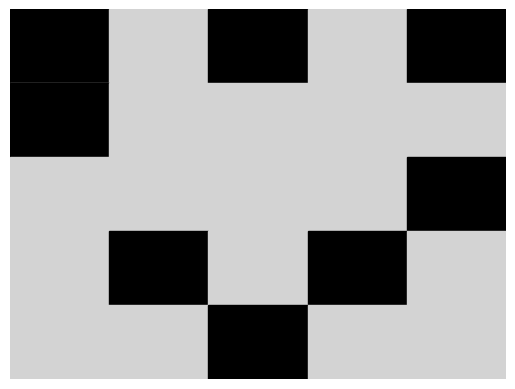

Enter the number of iterations to simulate:  3


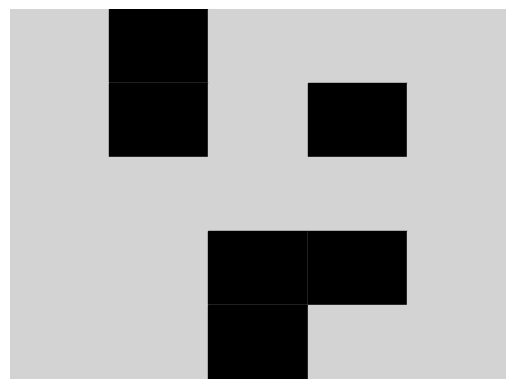

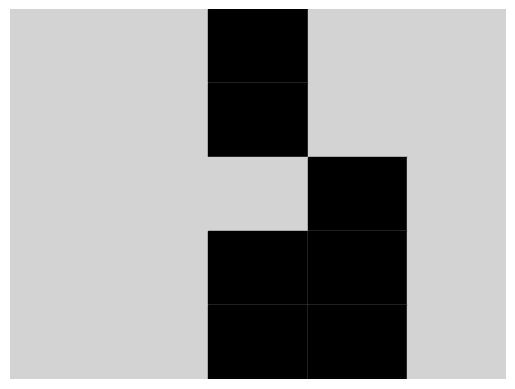

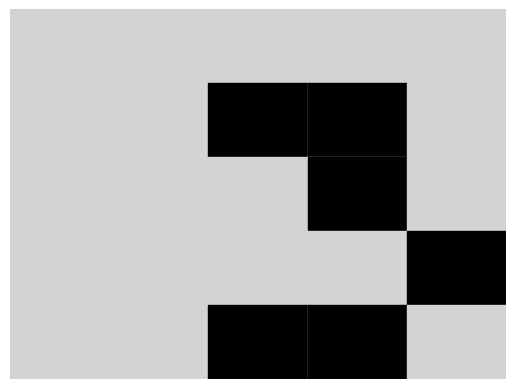

Do you want to update more times? (yes/no):  yes
Enter the number of iterations to simulate:  2


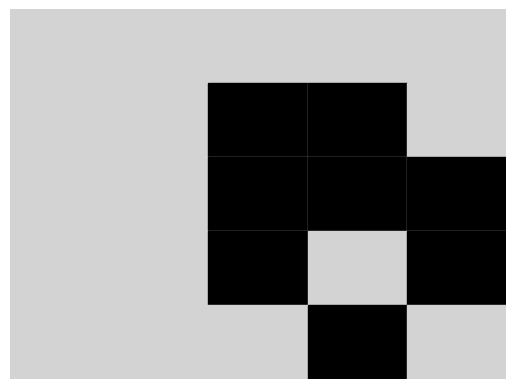

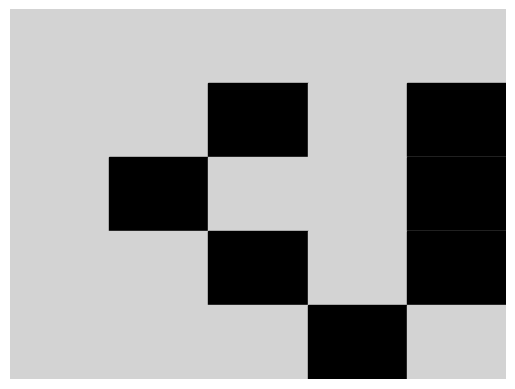

Do you want to update more times? (yes/no):  no
Do you want to save the initial and final configurations as a CSV file? (yes/no):  yes


In [19]:
def play_game_of_life_1():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    
    life_state = init_life_state_1(n, m, p)
    initial_state = life_state.copy()
    
    draw_life_state_1(life_state)
    
    while True:
        iterations = int(input("Enter the number of iterations to simulate: "))
        for _ in range(iterations):
            life_state = update_life_state_1(life_state)
            draw_life_state_1(life_state)
        
        if input("Do you want to update more times? (yes/no): ").strip().lower() != "yes":
            break
    
    if input("Do you want to save the initial and final configurations as a CSV file? (yes/no): ").strip().lower() == "yes":
        np.savetxt("initial_state.csv", initial_state, fmt="%d", delimiter=",")
        np.savetxt("final_state.csv", life_state, fmt="%d", delimiter=",")
play_game_of_life_1()


#### Level 2 (user-specified rules, 15 pts)

From a randomly selected initial subset of life cells, and a user-specified set of rules, find interesting patterns.

A user can specify a rule by inputting four integers: $b_1$, $b_2$, $d_1$, and $d_2$ between $0$ and $8$, and $d_1 \leq b_1 \leq b_2 \le d_2$. The rules are as follows:

- if a dead cell has at least $b_1$ and at most $b_2$ neighbors alive, then it the comes back to life
- if an alive cell has at least $d_1$ and at most $d_2$ neighbors alive, then it continues to be alive.
- if an alive cell has less than $d_1$ or more than $d_2$ neighbors alive, then the cell dies.

Notice that if $b_1 = 3$, $b_2 = 3$, $d_1 = 2$, and $d_2 = 3$, then the rules are the **basic rules**.

##### Task 2.1

The same as Task 1.1.

```python
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return init_life_state_1(n, m, p)
```

In [26]:
def init_life_state_2(n, m, p):
    """
    Generate an initial random subset of life cells (2D points)
    IN: n, int, number of rows
        m, int, number of columns
        p, float, probability of a cell being alive
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    return init_life_state_1(n, m, p)

##### Task 2.2

Implement a Python function `update_life_state_2()` that takes the same in input as `update_life_state_1()` plus the four integers that defaults to `b1=3, b2=3, d1=2, d2=3` and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

```python
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)
    for i in range(n):
        for j in range(m):
            live_neighbors = np.sum(life_state[max(i-1, 0):min(i+2, n), max(j-1, 0):min(j+2, m)] == 1) - life_state[i, j]
            if life_state[i, j] == 1:
                if d1 <= live_neighbors <= d2:
                    out_life_state[i, j] = 1
                else:
                    out_life_state[i, j] = 0
            else:
                if b1 <= live_neighbors <= b2:
                    out_life_state[i, j] = 1
                else:
                    out_life_state[i, j] = 0

    return out_life_state
```

Or you can create a constructor for `update_life_state_2()` as follows:

```python
def generate_update_life_state_2(b1=3, b2=3, d1=2, d2=3):
    """
    Generate a function that updates the life state according to the specified rules
    IN: b1, int, lower bound of the number of neighbors
        b2, int, upper bound of the number of neighbors
        d1, int, lower bound of the number of neighbors
        d2, int, upper bound of the number of neighbors
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using b1, b2, d1, and d2
    def update_life_state_2(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using b1, b2, d1, and d2
        pass

    # return the defined function
    return update_life_state_2
```

In [30]:
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        b1, int, lower bound of the number of neighbors for a dead cell to come back to life
        b2, int, upper bound of the number of neighbors for a dead cell to come back to life
        d1, int, lower bound of the number of neighbors for an alive cell to continue to be alive
        d2, int, upper bound of the number of neighbors for an alive cell to continue to be alive
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)
    for i in range(n):
        for j in range(m):
            live_neighbors = np.sum(life_state[max(i-1, 0):min(i+2, n), max(j-1, 0):min(j+2, m)] == 1) - life_state[i, j]
            if life_state[i, j] == 1:
                if d1 <= live_neighbors <= d2:
                    out_life_state[i, j] = 1
                else:
                    out_life_state[i, j] = 0
            else:
                if b1 <= live_neighbors <= b2:
                    out_life_state[i, j] = 1
                else:
                    out_life_state[i, j] = 0

    return out_life_state

##### Task 2.3

The same as Task 1.3.

##### Task 2.4

Implement a Python function `play_game_of_life_2()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules, and when saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary. For the **basic rules**, the JSON format should be as follows:
```json
{
    "b1": 3,
    "b2": 3,
    "d1": 2,
    "d2": 3
}
```

```python
def play_game_of_life_2():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    
    life_state = init_life_state_2(n, m, p)
    initial_state = life_state.copy()
    draw_life_state_1(life_state)
    
    print("Specify the rules:")
    b1 = int(input("Lower bound for dead cells to come alive (b1): "))
    b2 = int(input("Upper bound for dead cells to come alive (b2): "))
    d1 = int(input("Lower bound for live cells to stay alive (d1): "))
    d2 = int(input("Upper bound for live cells to stay alive (d2): "))
    
    while True:
        iterations = int(input("Enter the number of iterations to simulate: "))
        for _ in range(iterations):
            life_state = update_life_state_2(life_state, b1, b2, d1, d2)
            draw_life_state_1(life_state)
        
        if input("Do you want to update more times? (yes/no): ").strip().lower() != "yes":
            break
    
    if input("Do you want to save the configurations and rules? (yes/no): ").strip().lower() == "yes":
        np.savetxt("initial_state.csv", initial_state, fmt="%d", delimiter=",")
        np.savetxt("final_state.csv", life_state, fmt="%d", delimiter=",")
        
        rules = {"b1": b1, "b2": b2, "d1": d1, "d2": d2}
        with open("rules.json", "w") as f:
            json.dump(rules, f, indent=4)
        print("Configurations and rules saved to initial_state.csv, final_state.csv, and rules.json.")
```

Enter the number of rows:  6
Enter the number of columns:  6
Enter the probability of a cell being alive (0-1):  0.4


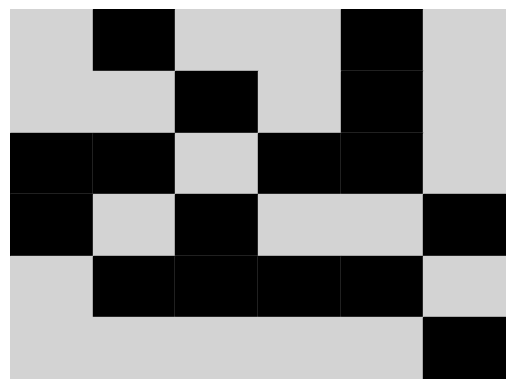

Specify the rules:


Lower bound for dead cells to come alive (b1):  3
Upper bound for dead cells to come alive (b2):  3
Lower bound for live cells to stay alive (d1):  2
Upper bound for live cells to stay alive (d2):  3
Enter the number of iterations to simulate:  3


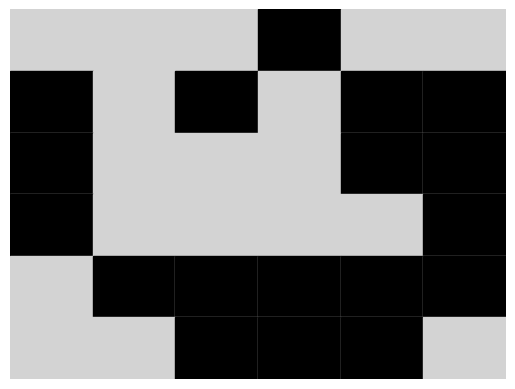

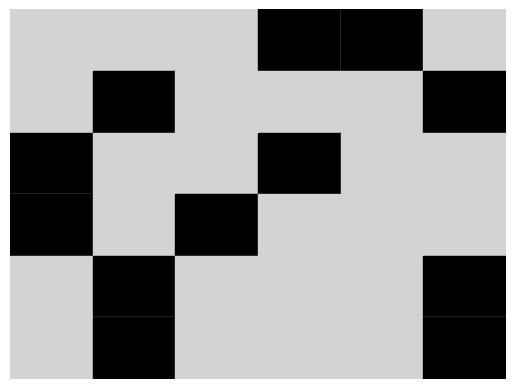

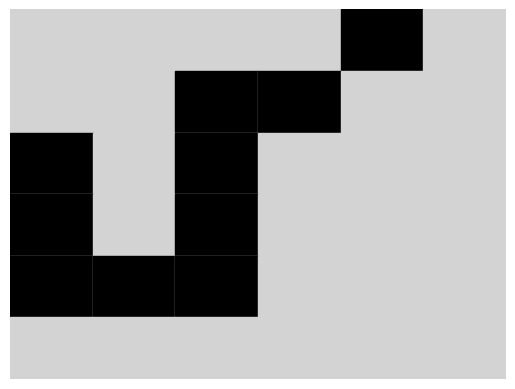

Do you want to update more times? (yes/no):  yes
Enter the number of iterations to simulate:  3


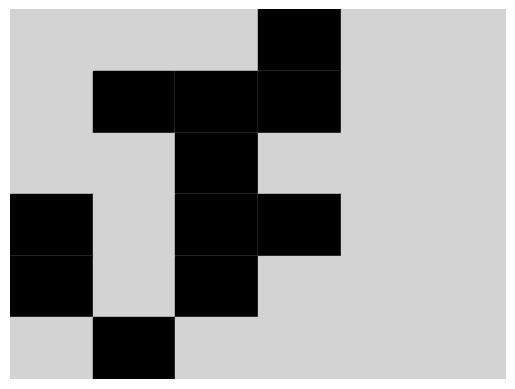

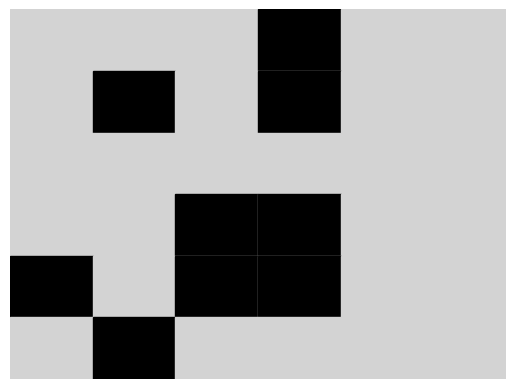

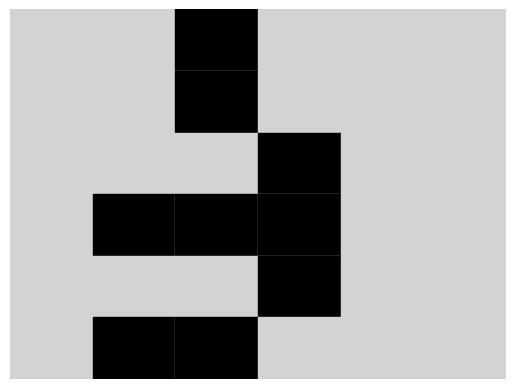

Do you want to update more times? (yes/no):  no
Do you want to save the configurations and rules? (yes/no):  yes


Configurations and rules saved to initial_state.csv, final_state.csv, and rules.json.


In [36]:
def play_game_of_life_2():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
    p = float(input("Enter the probability of a cell being alive (0-1): "))
    
    life_state = init_life_state_2(n, m, p)
    initial_state = life_state.copy()
    draw_life_state_1(life_state)
    
    print("Specify the rules:")
    b1 = int(input("Lower bound for dead cells to come alive (b1): "))
    b2 = int(input("Upper bound for dead cells to come alive (b2): "))
    d1 = int(input("Lower bound for live cells to stay alive (d1): "))
    d2 = int(input("Upper bound for live cells to stay alive (d2): "))
    
    while True:
        iterations = int(input("Enter the number of iterations to simulate: "))
        for _ in range(iterations):
            life_state = update_life_state_2(life_state, b1, b2, d1, d2)
            draw_life_state_1(life_state)
        
        if input("Do you want to update more times? (yes/no): ").strip().lower() != "yes":
            break
    
    if input("Do you want to save the configurations and rules? (yes/no): ").strip().lower() == "yes":
        np.savetxt("initial_state.csv", initial_state, fmt="%d", delimiter=",")
        np.savetxt("final_state.csv", life_state, fmt="%d", delimiter=",")
        
        rules = {"b1": b1, "b2": b2, "d1": d1, "d2": d2}
        with open("rules.json", "w") as f:
            json.dump(rules, f, indent=4)
        print("Configurations and rules saved to initial_state.csv, final_state.csv, and rules.json.")
play_game_of_life_2()

#### Level 3 (non-binary states, 30 pts)

In this level, the states of the cells are not binary. Instead, the states are integers between $0$ and $255$, each representing a user specified state. For example, each cell may have three possibilities:
- $0$ to represent a removed cell
- $1$ to represent a live and susceptible cell
- $2$ to represent a cell infected by a virus

A set of rules could be:

A subset of cells is selected randomly to be infected (2), and the rest are susceptible (1). The grid is updated in each time step as follows:

- Infected (2) cells get a chance to pass the infection along to each of their Susceptible (1) neighbors, with a probability equal to the transmission rate.
- Infected (2) cells have a chance to transition to the removed (0) state, indicating that they are no longer capable of infecting others or being infected again. The probability of this transition is equal to the recovery rate.

```mermaid
stateDiagram-v2

S: Susceptible
I: Infected
R: Removed

S --> I: neighbor of an infected cell, and the infected cell infects the susceptible cell
S --> S: no infected neighbor, or the infected cell does not infect the susceptible cell
I --> R: recovers
R --> R
```

##### Task 3.1

After playing the game at https://meltingasphalt.com/interactive/going-critical/ and https://ncase.me/simulating/model/

- Implement a Python function `init_life_state_3()` by using NumPy to generate an initial random subset of non-binary cells.
- Implement a Python function `draw_life_state_3()` by using matplotlib to display the selected collection of cells (points). Use the following line of Python code to paint the background of the selected collection of cells in their respective colors with transparency.
```python
def draw_cell_background(x, y, color):
    plt.fill([x-0.5, x-0.5, x+0.5, x+0.5], [y-0.5, y+0.5, y+0.5, y-0.5], color=color, alpha=0.5)
```

```python
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    # Validate that probabilities sum to 1 and match number of states
    if len(p_list) != len(states) or not np.isclose(sum(p_list), 1.0):
        raise ValueError("p_list must sum to 1 and match length of states")
    
    # Use numpy.random.choice to generate initial state
    return np.random.choice(states, size=(n, m), p=p_list)
```

```python
def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    plt.clf()  # Clear the current figure
    
    n, m = life_state.shape
    
    # Validate that we have a color for each possible state
    unique_states = np.unique(life_state)
    if len(colors) < len(unique_states):
        raise ValueError("Not enough colors provided for all states")
    
    # Draw each cell with its corresponding color
    for i in range(n):
        for j in range(m):
            state = life_state[i, j]
            color = colors[state]  # Get color for current state
            # Convert to display coordinates (flip y-axis to match display convention)
            draw_cell_background(j, n-i-1, color)
    
    # Set the plot limits and remove axes
    plt.xlim(-0.5, m-0.5)
    plt.ylim(-0.5, n-0.5)
    plt.axis('off')
    plt.pause(0.1)  # Add small pause for animation effect
```

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import json
def draw_cell_background(x, y, color):
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color))


In [44]:
def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    IN: n, int, number of rows
        m, int, number of columns
        p_list, list of float, probabilities of each state
        states, list of int, possible states of the cells
    OUT: ndarray of shape (n, m), initial state of the cells
    """
    # Validate that probabilities sum to 1 and match number of states
    if len(p_list) != len(states) or not np.isclose(sum(p_list), 1.0):
        raise ValueError("p_list must sum to 1 and match length of states")
    
    # Use numpy.random.choice to generate initial state
    return np.random.choice(states, size=(n, m), p=p_list)

def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells (2D points)
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        colors, list of str, colors of the states
    OUT: None
    """
    plt.clf()  # Clear the current figure
    
    n, m = life_state.shape
    
    # Validate that we have a color for each possible state
    unique_states = np.unique(life_state)
    if len(colors) < len(unique_states):
        raise ValueError("Not enough colors provided for all states")
    
    # Draw each cell with its corresponding color
    for i in range(n):
        for j in range(m):
            state = life_state[i, j]
            color = colors[state]  # Get color for current state
            # Convert to display coordinates (flip y-axis to match display convention)
            draw_cell_background(j, n-i-1, color)
    
    # Set the plot limits and remove axes
    plt.xlim(-0.5, m-0.5)
    plt.ylim(-0.5, n-0.5)
    plt.axis('off')
    plt.pause(0.1) 

##### Task 3.2

Implement a Python function `update_life_state_3()` that takes a 2D NumPy array representing the current state of the grid, and a dictionary specifying the rules, and returns a new 2D NumPy array representing the next state of the grid according to the rules specified above.

For the Susceptible-Infected-Removed rules, the dictionary should be as follows:
```python
rules = {
    0: [  # removed cells
        {
            "turn_to": 0  # always stay removed
        }
    ],
    1: [  # susceptible cells
        {
            "neighbor_to": {
                "if": [  # adjacent to at least 1 infected cell (type 2)
                    {
                        "at_least": 1,
                        "at_most": 9,  # always true
                        "type": 2
                    }
                ],
                "then": {
                    "probability": [  # 25% chance of getting infected and 75% chance of staying susceptible
                        {
                            "value": 0.25,  # transmission rate 25%
                            "then": {
                                "turn_to": 2
                            },
                        },
                        {
                            "value": 0.75,  # leftover 75%
                            "then": {
                                "turn_to": 1
                            }
                        }
                    ]
                }
            }
        }
    ],
    2: [
        {  # infected cells
            "probability": [  # 50% chance of recovering and 50% chance of staying infected
                {
                    "value": 0.5,  # recovery rate 50%
                    "then": {
                        "turn_to": 0
                    }
                },
                {
                    "value": 0.5,  # leftover 50%
                    "then": {
                        "turn_to": 2
                    }
                }
            ]
        }
    ]
}
```

In [47]:
rules = {
    0: [{"turn_to": 0}],
    1: [{  # susceptible cells
        "neighbor_to": {
            "if": [  # Note the list brackets here
                {
                    "at_least": 1,
                    "at_most": 9,
                    "type": 2
                }
            ],
            "then": {
                "probability": [
                    {"value": 0.25, "then": {"turn_to": 2}},
                    {"value": 0.75, "then": {"turn_to": 1}}
                ]
            }
        }
    }],
    2: [{  # infected cells
        "probability": [
            {"value": 0.5, "then": {"turn_to": 0}},
            {"value": 0.5, "then": {"turn_to": 2}}
        ]
    }]
}

```python
def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    
    # Create output array if not provided
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)
    
    # Create padded array for neighbor counting
    padded_state = np.pad(life_state, pad_width=1, mode='constant', constant_values=0)
    
    # Process each cell
    for i in range(n):
        for j in range(m):
            current_state = life_state[i, j]
            rules = rules_dict[current_state]
            
            for rule in rules:
                if "turn_to" in rule:
                    # Simple state transition
                    out_life_state[i, j] = rule["turn_to"]
                
                elif "probability" in rule:
                    # Probability-based transition
                    rand = np.random.random()
                    cumulative_prob = 0
                    
                    for prob_rule in rule["probability"]:
                        cumulative_prob += prob_rule["value"]
                        if rand <= cumulative_prob:
                            out_life_state[i, j] = prob_rule["then"]["turn_to"]
                            break
                
                elif "neighbor_to" in rule:
                    # Count specific type of neighbors
                    neighborhood = padded_state[i:i+3, j:j+3]
                    conditions_met = True
                    
                    for condition in rule["neighbor_to"]["if"]:
                        neighbor_count = np.sum(neighborhood == condition["type"])
                        if current_state == condition["type"]:
                            neighbor_count -= 1  # Don't count self
                            
                        if not (condition["at_least"] <= neighbor_count <= condition["at_most"]):
                            conditions_met = False
                            break
                    
                    if conditions_met:
                        # Apply probability rules if conditions are met
                        rand = np.random.random()
                        cumulative_prob = 0
                        
                        for prob_rule in rule["neighbor_to"]["then"]["probability"]:
                            cumulative_prob += prob_rule["value"]
                            if rand <= cumulative_prob:
                                out_life_state[i, j] = prob_rule["then"]["turn_to"]
                                break
    
    return out_life_state
```

Or you can create a constructor for `update_life_state_3()` as follows:

```python
def generate_update_life_state_3(rules_dict):
    """
    Generate a function that updates the life state according to the specified rules
    IN: rules_dict, dict, rules for updating the cells
    OUT: function, (life_state, out_life_state=None) -> out_life_state, evaluates the update rules for each cell
    """
    # define the update function using rules_dict
    def update_life_state_3(life_state, out_life_state=None):
        """
        For each cell evaluate the update rules specified above to obtain its new state
        IN: life_state, ndarray of shape (n, m), initial state of the cells
            out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
        OUT: ndarray of shape (n, m), next state of the cells
        """
        # specify the update rules using rules_dict
        pass

    # return the defined function
    return update_life_state_3
```

In [49]:
def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    IN: life_state, ndarray of shape (n, m), initial state of the cells
        rules_dict, dict, rules for updating the cells
        out_life_state, ndarray of shape (n, m), for storing the next state of the cells, if None, create a new array
    OUT: ndarray of shape (n, m), next state of the cells
    """
    n, m = life_state.shape
    
    # Create output array if not provided
    if out_life_state is None:
        out_life_state = np.zeros((n, m), dtype=int)
    
    # Create padded array for neighbor counting
    padded_state = np.pad(life_state, pad_width=1, mode='constant', constant_values=0)
    
    # Process each cell
    for i in range(n):
        for j in range(m):
            current_state = life_state[i, j]
            rules = rules_dict[current_state]
            
            for rule in rules:
                if "turn_to" in rule:
                    # Simple state transition
                    out_life_state[i, j] = rule["turn_to"]
                
                elif "probability" in rule:
                    # Probability-based transition
                    rand = np.random.random()
                    cumulative_prob = 0
                    
                    for prob_rule in rule["probability"]:
                        cumulative_prob += prob_rule["value"]
                        if rand <= cumulative_prob:
                            out_life_state[i, j] = prob_rule["then"]["turn_to"]
                            break
                
                elif "neighbor_to" in rule:
                    # Count specific type of neighbors
                    neighborhood = padded_state[i:i+3, j:j+3]
                    conditions_met = True
                    
                    for condition in rule["neighbor_to"]["if"]:
                        neighbor_count = np.sum(neighborhood == condition["type"])
                        if current_state == condition["type"]:
                            neighbor_count -= 1  # Don't count self
                            
                        if not (condition["at_least"] <= neighbor_count <= condition["at_most"]):
                            conditions_met = False
                            break
                    
                    if conditions_met:
                        # Apply probability rules if conditions are met
                        rand = np.random.random()
                        cumulative_prob = 0
                        
                        for prob_rule in rule["neighbor_to"]["then"]["probability"]:
                            cumulative_prob += prob_rule["value"]
                            if rand <= cumulative_prob:
                                out_life_state[i, j] = prob_rule["then"]["turn_to"]
                                break
    
    return out_life_state

##### Task 3.3

Similar to Task 1.3, except that the function to be called is `draw_life_state_3()`.

##### Task 3.4

Implement a Python function `play_game_of_life_3()` that is similar to Task 1.4 `play_game_of_life_1()`, except that the user should be able to specify the rules as a JSON file in the format of a dictionary. When saving the initial collection of life cells and the final configuration, the function should also write the rules as a JSON file in the format of a dictionary.

```python
def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
   
    print("\nEnter states and probabilities:")
    num_states = int(input("Enter number of states: "))
    states = []
    p_list = []
    colors = []
   
    for i in range(num_states):
       state = int(input(f"Enter state {i}: "))
       prob = float(input(f"Enter probability for state {i} (0-1): "))
       color = input(f"Enter color for state {i}: ")
       states.append(state)
       p_list.append(prob)
       colors.append(color)
    # ask the user for the rules
    rules_file = input("\nEnter path to JSON rules file (or press Enter for default SIR rules): ")
   
    if rules_file:
       with open(rules_file, 'r') as f:
           rules = json.load(f)
    else:
       # Default SIR model rules
       rules = {
           0: [{"turn_to": 0}],  # removed cells stay removed
           1: [{  # susceptible cells
               "neighbor_to": {
                   "if": [{"at_least": 1, "at_most": 9, "type": 2}],
                   "then": {
                       "probability": [
                           {"value": 0.25, "then": {"turn_to": 2}},
                           {"value": 0.75, "then": {"turn_to": 1}}
                       ]
                   }
               }
           }],
           2: [{  # infected cells
               "probability": [
                   {"value": 0.5, "then": {"turn_to": 0}},
                   {"value": 0.5, "then": {"turn_to": 2}}
               ]
           }]
       }

    # initialize and store initial state
    life_state = init_life_state_3(n, m, p_list, states)
    initial_state = life_state.copy()
    # update the grid and display it at each iteration
    while True:
        draw_life_state_3(life_state, colors)
        iterations = int(input("\nEnter number of iterations (0 to stop): "))
        if iterations == 0:
            break
            
        for _ in range(iterations):
            life_state = update_life_state_3(life_state, rules)
            draw_life_state_3(life_state, colors)
    # ask the user if he/she wants to update more times
    if input("\nDo you want to update more times? (yes/no): ").strip().lower() != 'yes':
            break
    # ask the user if he/she wants to save the initial collection of life cells and the final configuration as a csv file, and the rules as a JSON file
    save = input("\nSave states and rules? (yes/no): ").strip().lower()
    if save == 'yes':
        np.savetxt('initial_state.csv', initial_state, delimiter=',', fmt='%d')
        np.savetxt('final_state.csv', life_state, delimiter=',', fmt='%d')
        with open('rules.json', 'w') as f:
            json.dump(rules, f, indent=4)
        with open('states_info.json', 'w') as f:
            json.dump({
                'states': states,
                'probabilities': p_list,
                'colors': colors
            }, f, indent=4)
```

Enter the number of rows:  3
Enter the number of columns:  4



Enter states and probabilities:


Enter number of states:  3
Enter state 0:  0
Enter probability for state 0 (0-1):  0.3
Enter color for state 0:  black
Enter state 1:  1
Enter probability for state 1 (0-1):  0.5
Enter color for state 1:  red
Enter state 2:  2
Enter probability for state 2 (0-1):  0.2
Enter color for state 2:  green

Enter path to JSON rules file (or press Enter for default SIR rules):  


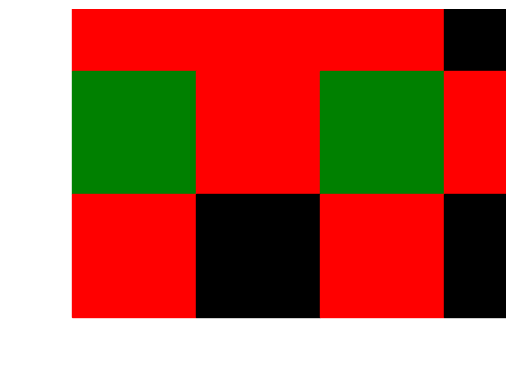


Enter number of iterations (0 to stop):  3


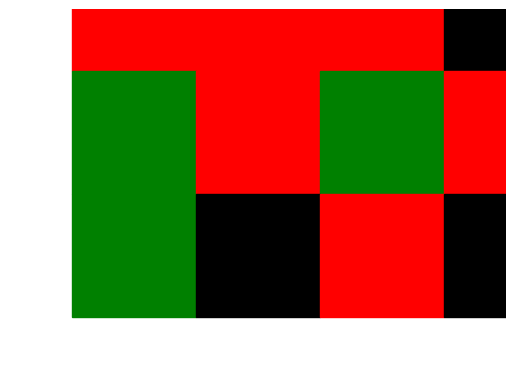

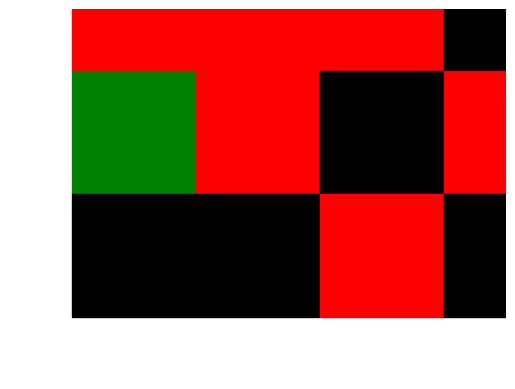

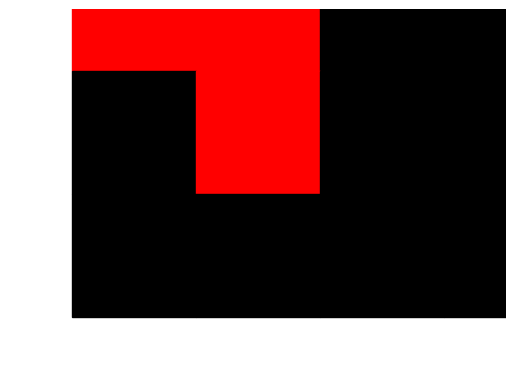


Do you want to update more times? (yes/no):  yes


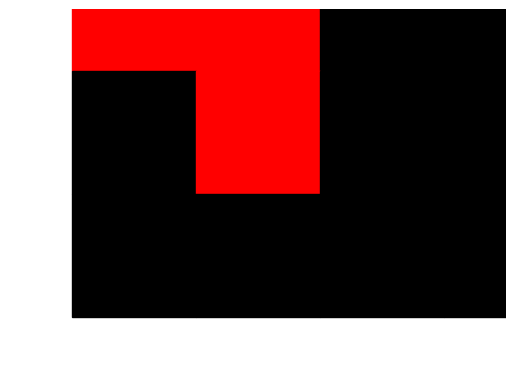


Enter number of iterations (0 to stop):  1


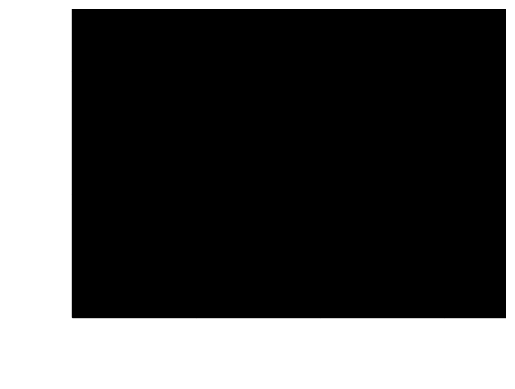


Do you want to update more times? (yes/no):  no

Save states and rules? (yes/no):  yes


In [55]:
def play_game_of_life_3():
    """
    Play the game of life
    IN: None
    OUT: None
    """
    # ask the user for initial state
    n = int(input("Enter the number of rows: "))
    m = int(input("Enter the number of columns: "))
   
    print("\nEnter states and probabilities:")
    num_states = int(input("Enter number of states: "))
    states, p_list, colors = [], [], []
    for i in range(num_states):
        state = int(input(f"Enter state {i}: "))
        prob = float(input(f"Enter probability for state {i} (0-1): "))
        color = input(f"Enter color for state {i}: ")
        states.append(state)
        p_list.append(prob)
        colors.append(color)

    # ask the user for the rules
    rules_file = input("\nEnter path to JSON rules file (or press Enter for default SIR rules): ")
    if rules_file:
        with open(rules_file, 'r') as f:
            rules = json.load(f)
    else:
        rules = {
    0: [{"turn_to": 0}],
    1: [{
        "neighbor_to": {
            "if": [                        # Array of conditions
                {                          # Each condition is an object
                    "at_least": 1,
                    "at_most": 9,
                    "type": 2              # This is what we're trying to access
                }
            ],
            "then": {
                "probability": [
                    {"value": 0.25, "then": {"turn_to": 2}},
                    {"value": 0.75, "then": {"turn_to": 1}}
                ]
            }
        }
    }],
    2: [{
        "probability": [
            {"value": 0.5, "then": {"turn_to": 0}},
            {"value": 0.5, "then": {"turn_to": 2}}
        ]
    }]
}
    # initialize and store initial state
    life_state = init_life_state_3(n, m, p_list, states)
    initial_state = life_state.copy()

    # update the grid and display it at each iteration
    while True:
        draw_life_state_3(life_state, colors)
        iterations = int(input("\nEnter number of iterations (0 to stop): "))
        if iterations == 0:
            break
           
        for _ in range(iterations):
            life_state = update_life_state_3(life_state, rules)
            draw_life_state_3(life_state, colors)
           
        # ask the user if they want to update more times
        if input("\nDo you want to update more times? (yes/no): ").strip().lower() != 'yes':
            break

    # ask about saving results    
    save = input("\nSave states and rules? (yes/no): ").strip().lower()
    if save == 'yes':
        np.savetxt('initial_state.csv', initial_state, delimiter=',', fmt='%d')
        np.savetxt('final_state.csv', life_state, delimiter=',', fmt='%d')
        with open('rules.json', 'w') as f:
            json.dump(rules, f, indent=4)
        with open('states_info.json', 'w') as f:
            json.dump({'states': states, 'probabilities': p_list, 'colors': colors}, f, indent=4)
play_game_of_life_3()

#### References

> - Gardner, Martin (October 1970). "The fantastic combinations of John Conway's new solitaire game 'life'" (PDF). Mathematical Games. Scientific American. Vol. 223, no. 4. pp. 120–123. doi:10.1038/scientificamerican1070-120. JSTOR 24927642.
> - Berlekamp, E. R.; Conway, John Horton; Guy, R. K. (2001–2004). Winning Ways for your Mathematical Plays (2nd ed.). A K Peters Ltd.
> - Izhikevich, Eugene M.; Conway, John H.; Seth, Anil (2015-06-21). "Game of Life". Scholarpedia. 10 (6): 1816. Bibcode:2015SchpJ..10.1816I. doi:10.4249/scholarpedia.1816. ISSN 1941-6016.
> - "NaiveLife Emulated: A reading-order simulation of Life". ConwayLife.com. 24 May 2020.
> - Goucher, Adam. "Re: Thread For Your Accidental Discoveries". ConwayLife.com.
> - Ian07. "Re: Strange spaceship that is supposed to be impossible and infinite cell spread". ConwayLife.com. "I'm pretty sure this is because you've accidentally created an implementation of what's sometimes known as NaiveLife (as it's a common mistake made by many people coding CGoL for the first time):"
> - Brown, Nico; Cheng, Carson; Jacobi, Tanner; Karpovich, Maia; Merzenich, Matthias; Raucci, David; Riley, Mitchell (5 December 2023). "Conway's Game of Life is Omniperiodic". arXiv:2312.02799 [math.CO].
> - "LifeWiki:Game of Life Status page - LifeWiki". conwaylife.com.
> - Stone, Alex (2024-01-18). "Math's 'Game of Life' Reveals Long-Sought Repeating Patterns". Quanta Magazine.
> - "Conway's Game of Life". Rosetta Code. June 7, 2024.